# Segmentación de datos de Clientes

La segmentación mediante K-Means tiene una amplia gama de aplicaciones en el contexto empresarial, independientemente del tamaño de la empresa. Una de las aplicaciones más comunes es la segmentación de clientes. Las empresas pueden utilizar K-Means para agrupar a sus clientes en categorías basadas en características como el comportamiento de compra, la demografía o las preferencias. Esto permite a las empresas personalizar sus estrategias de marketing y servicios para cada grupo, mejorando así la satisfacción del cliente y aumentando las ventas.

Otra aplicación importante es la segmentación de productos. Las empresas pueden utilizar K-Means para agrupar productos similares en categorías, lo como recomendaciones personalizadas y gestión de inventario. Además, las empresas pueden aplicar K-Means en la optimización de la cadena de suministro, agrupando proveedores o centros de distribución en función de la proximidad geográfica o la capacidad. Esto puede ayudar a mejorar la eficiencia logística y reducir costos.

En resumen, la segmentación mediante K-Means es una herramienta poderosa para las empresas de todos los tamaños. Puede ayudar a mejorar la toma de decisiones, la personalización de servicios, la gestión de productos y la eficiencia en la cadena de suministro. A medida que las empresas continúan recolectando datos, K-Means se vuelve aún más relevante para extraer información valiosa y tomar decisiones basadas en datos en el competitivo mundo empresarial.

## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualización 3D  
import plotly as py
import plotly.graph_objs as go

## EDA

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.drop(columns=['Gender'], inplace=True)

/var/folders/n4/hb64hxbn4bn6p9540q84tpcr0000gn/T/ipykernel_38418/2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<AxesSubplot:xlabel='Age', ylabel='Density'>

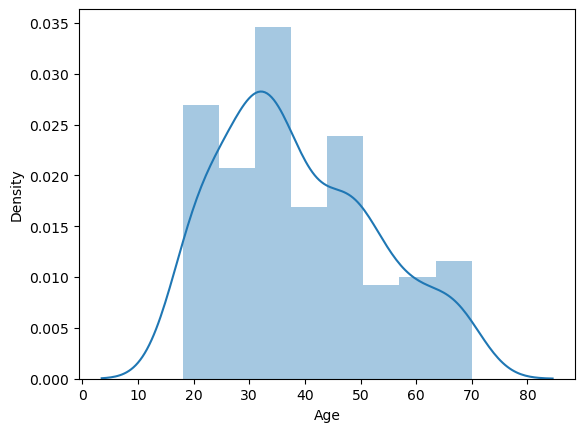

In [6]:
sns.distplot(df["Age"])

/var/folders/n4/hb64hxbn4bn6p9540q84tpcr0000gn/T/ipykernel_38418/2895917201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

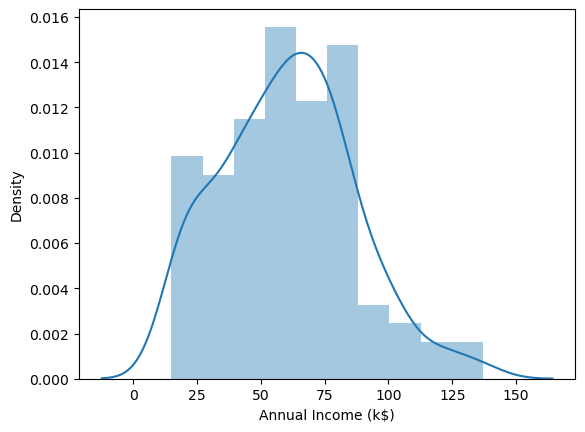

In [7]:
sns.distplot(df["Annual Income (k$)"])

/var/folders/n4/hb64hxbn4bn6p9540q84tpcr0000gn/T/ipykernel_38418/73916267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"])


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

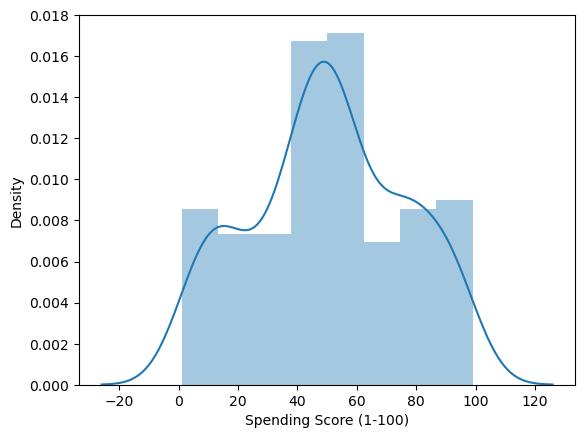

In [8]:
sns.distplot(df["Spending Score (1-100)"])

### K-means Clustering
K-means es un destacado algoritmo de agrupación de datos que se destaca por su velocidad y eficiencia, siendo ideal para conjuntos de datos extensos. Desarrollado en 1957, se basa en encontrar grupos de datos alrededor de centros llamados centroides, con el objetivo de maximizar la similitud dentro de grupos (intra-cluster) y minimizar la similitud entre grupos (inter-cluster). Para emplearlo, primero se elige el número de grupos K y se seleccionan aleatoriamente K centroides. Luego, cada dato se asigna al centroide más cercano, se recalculan los centroides y se repite el proceso hasta que dejen de cambiar. Aunque la elección aleatoria de centroides puede influir en los resultados, esta influencia se controla en herramientas como scikit-learn.

En síntesis, K-means es una herramienta poderosa y versátil para identificar patrones y agrupar datos, adecuada para conjuntos de datos extensos. Su sencillez y rapidez lo convierten en una opción popular en diversas aplicaciones de segmentación y análisis de datos.

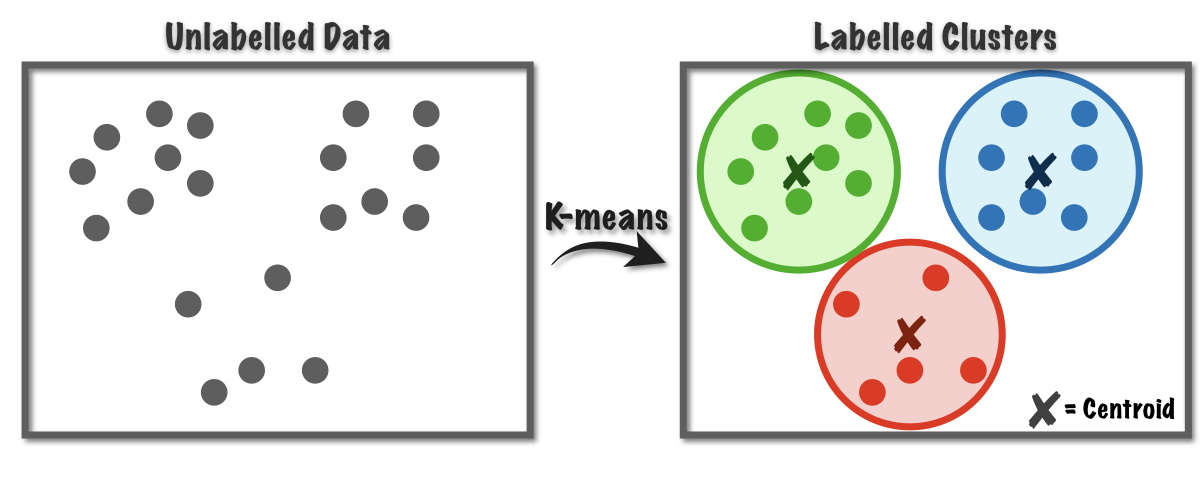

#### Segmentación de Clientes por su facturación

In [9]:
df1 = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [10]:
df1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


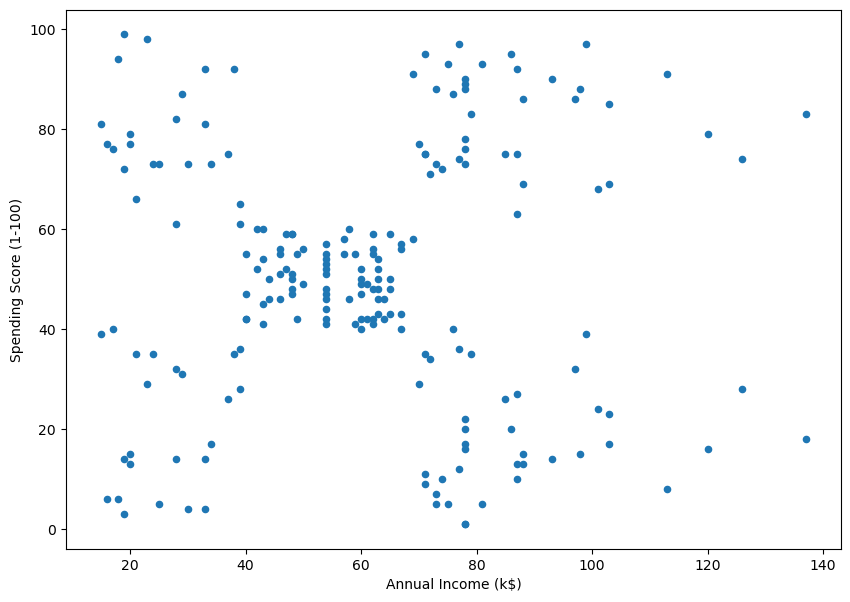

In [11]:
df1.plot(kind="scatter",
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        figsize=(10, 7))
plt.show()

#### Método de Elbow para encontrar número ótpimo de Clústers.

El método del codo es una técnica usada en el análisis de clústeres para encontrar el número óptimo de grupos en un conjunto de datos. Se calcula la inercia (suma de las distancias al cuadrado de los puntos a los centroides) para diferentes valores de K (número de clústeres) y se grafica. El punto en el gráfico donde la curva muestra un cambio brusco, similar a un "codo", se elige como el número óptimo de clústeres

Este enfoque proporciona una forma sencilla de determinar K, pero en algunos casos, la elección puede no ser del todo clara, por lo que se pueden considerar otros métodos de evaluación, como el análisis de silueta, para tomar decisiones más informadas.

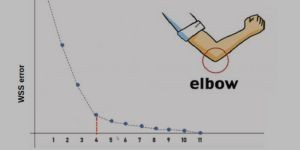

In [34]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [13]:
sum_of_sqr_dist

{1: 269981.28,
 2: 181363.59595959593,
 3: 106348.37306211118,
 4: 73679.78903948834,
 5: 44448.45544793371,
 6: 37239.83554245604,
 7: 30273.394312070042,
 8: 25050.832307547527,
 9: 22813.90785018553}

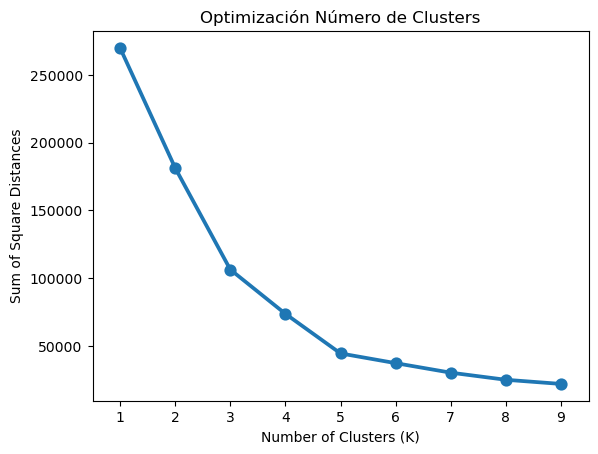

In [35]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Optimización Número de Clusters")
plt.show()

### K-Means Clustering

In [15]:
Model = KMeans(n_clusters=5,
             init='k-means++',
             max_iter=1000)
Model.fit(df1)

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=1000, n_clusters=5)

In [16]:
print("Labels", Model.labels_)

Labels [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [17]:
print("Centroids", Model.cluster_centers_)

Centroids [[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


In [18]:
centroids = Model.cluster_centers_

In [19]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,4
2,15,81,1
3,16,6,4
4,16,77,1
5,17,40,4


#### Visualización de los Clústers

In [36]:
Color = ['red', 'blue', 'black', 'gold', 'navy']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

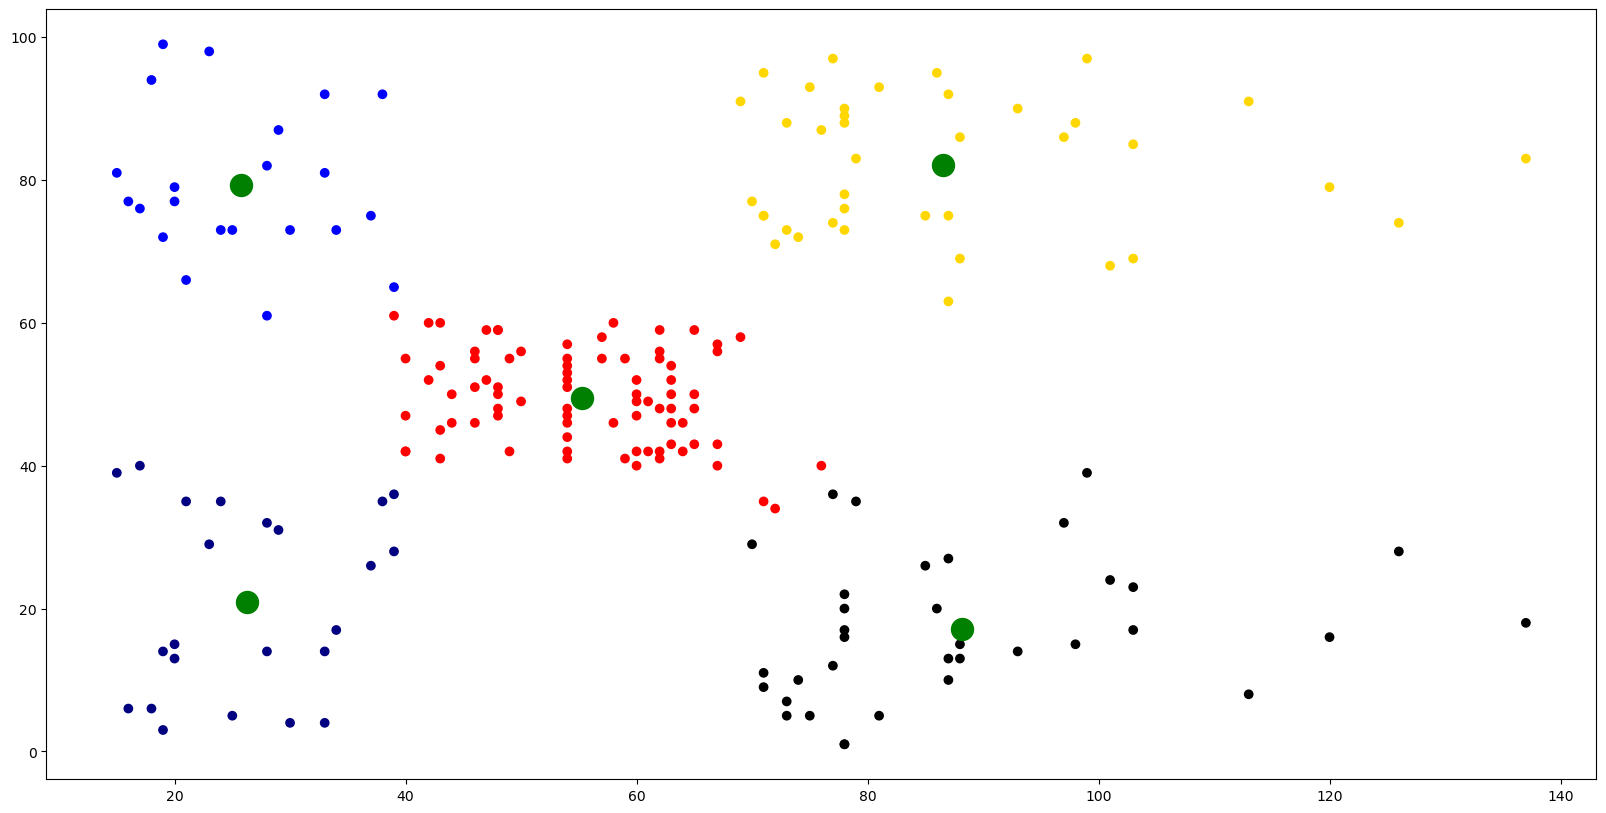

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(df1["Annual Income (k$)"],
           df1["Spending Score (1-100)"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

#### Evaluación con Silhouette Score

El Silhouette Score es una métrica que mide cuán bien definidos y separados están los clústeres en un conjunto de datos. Varía de -1 a 1, donde valores más cercanos a 1 indican una mejor agrupación. Se calcula considerando la proximidad de cada punto de datos a otros en el mismo clúster y la distancia a puntos en clústeres diferentes. Un valor cercano a 0 sugiere una ambigüedad en la agrupación, mientras que un valor más alto indica una clara separación entre los clústeres.

In [23]:
labels = Model.labels_

In [24]:
silhouette_score(df1, labels)

0.553931997444648

In [25]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/

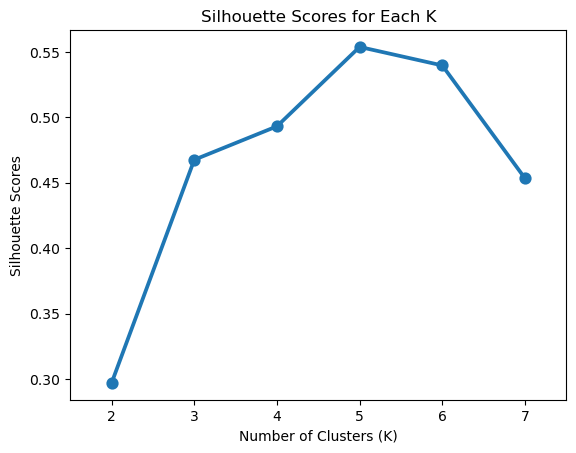

In [26]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores para cada Clúster")
plt.show()

### Segmentación con las tres características en 3D

In [37]:
df2= df.copy()

In [38]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

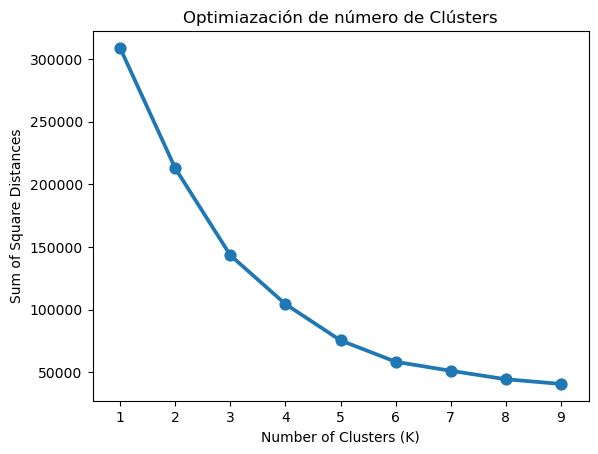

In [39]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Optimiazación de número de Clústers")
plt.show()

In [40]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=1000, n_clusters=6)

In [41]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

/Users/lucasfernandezmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,19,15,39,3
2,21,15,81,4
3,20,16,6,3
4,23,16,77,4
5,31,17,40,3


# Visualización en 3D

In [42]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [43]:
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['Age'],
                    y = df2['Annual Income (k$)'],
                    z = df2['Spending Score (1-100)'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 5, line=dict(color=df2['labels'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Age'),
                                yaxis = dict(title = 'Annual Income (k$)'),
                                zaxis = dict(title = 'Spending Score (1-100)'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()